In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('mushrooms.csv')

In [61]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [62]:
# encoding

from sklearn.preprocessing import OrdinalEncoder

In [63]:
oe=OrdinalEncoder()

In [64]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [65]:
df[['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]=oe.fit_transform(df[['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [68]:


from sklearn.linear_model import LogisticRegression

In [69]:
lr=LogisticRegression()

In [70]:
lr.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred=lr.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test,y_pred).round(2)

0.95

In [74]:
# Decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3)

In [134]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [135]:
y_pred_dtc=dtc.predict(x_test)

In [136]:
accuracy_score(y_test,y_pred_dtc).round(2)

0.95

In [127]:
from sklearn import tree

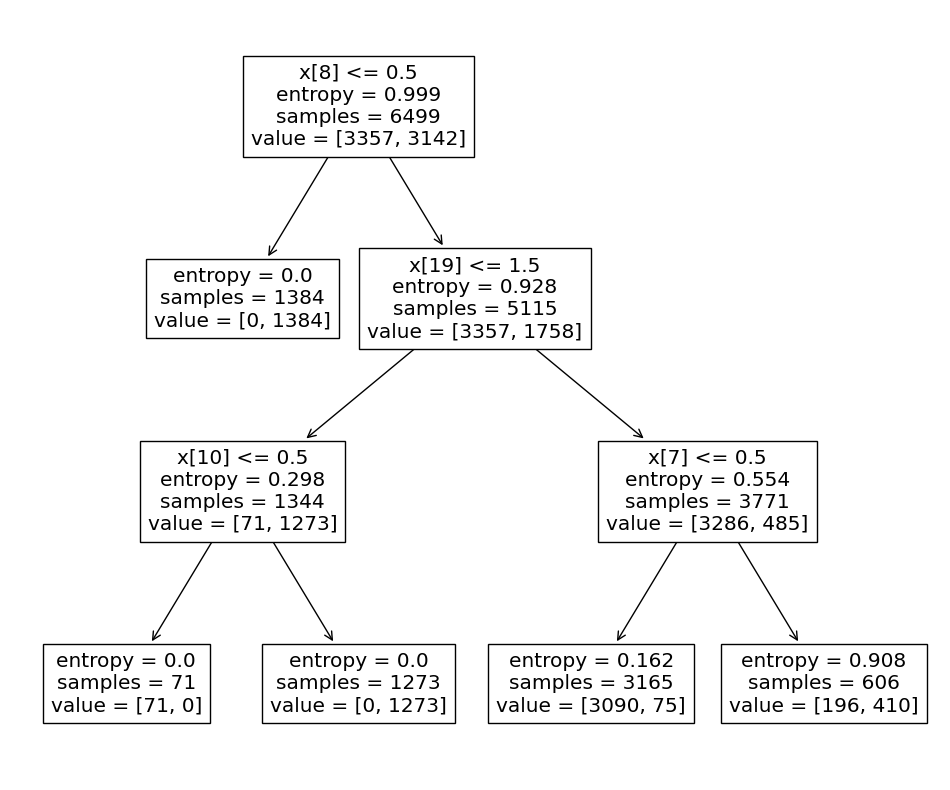

In [128]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtc.fit(x_train,y_train))
plt.show()

In [80]:
# Random forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rfc=RandomForestClassifier(max_features=10,random_state=42,max_depth=3)

In [167]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=10, random_state=42)

In [168]:
y_pred_rfc=rfc.predict(x_test)

In [169]:
accuracy_score(y_test,y_pred_rfc).round(2)

0.98

<Axes: >

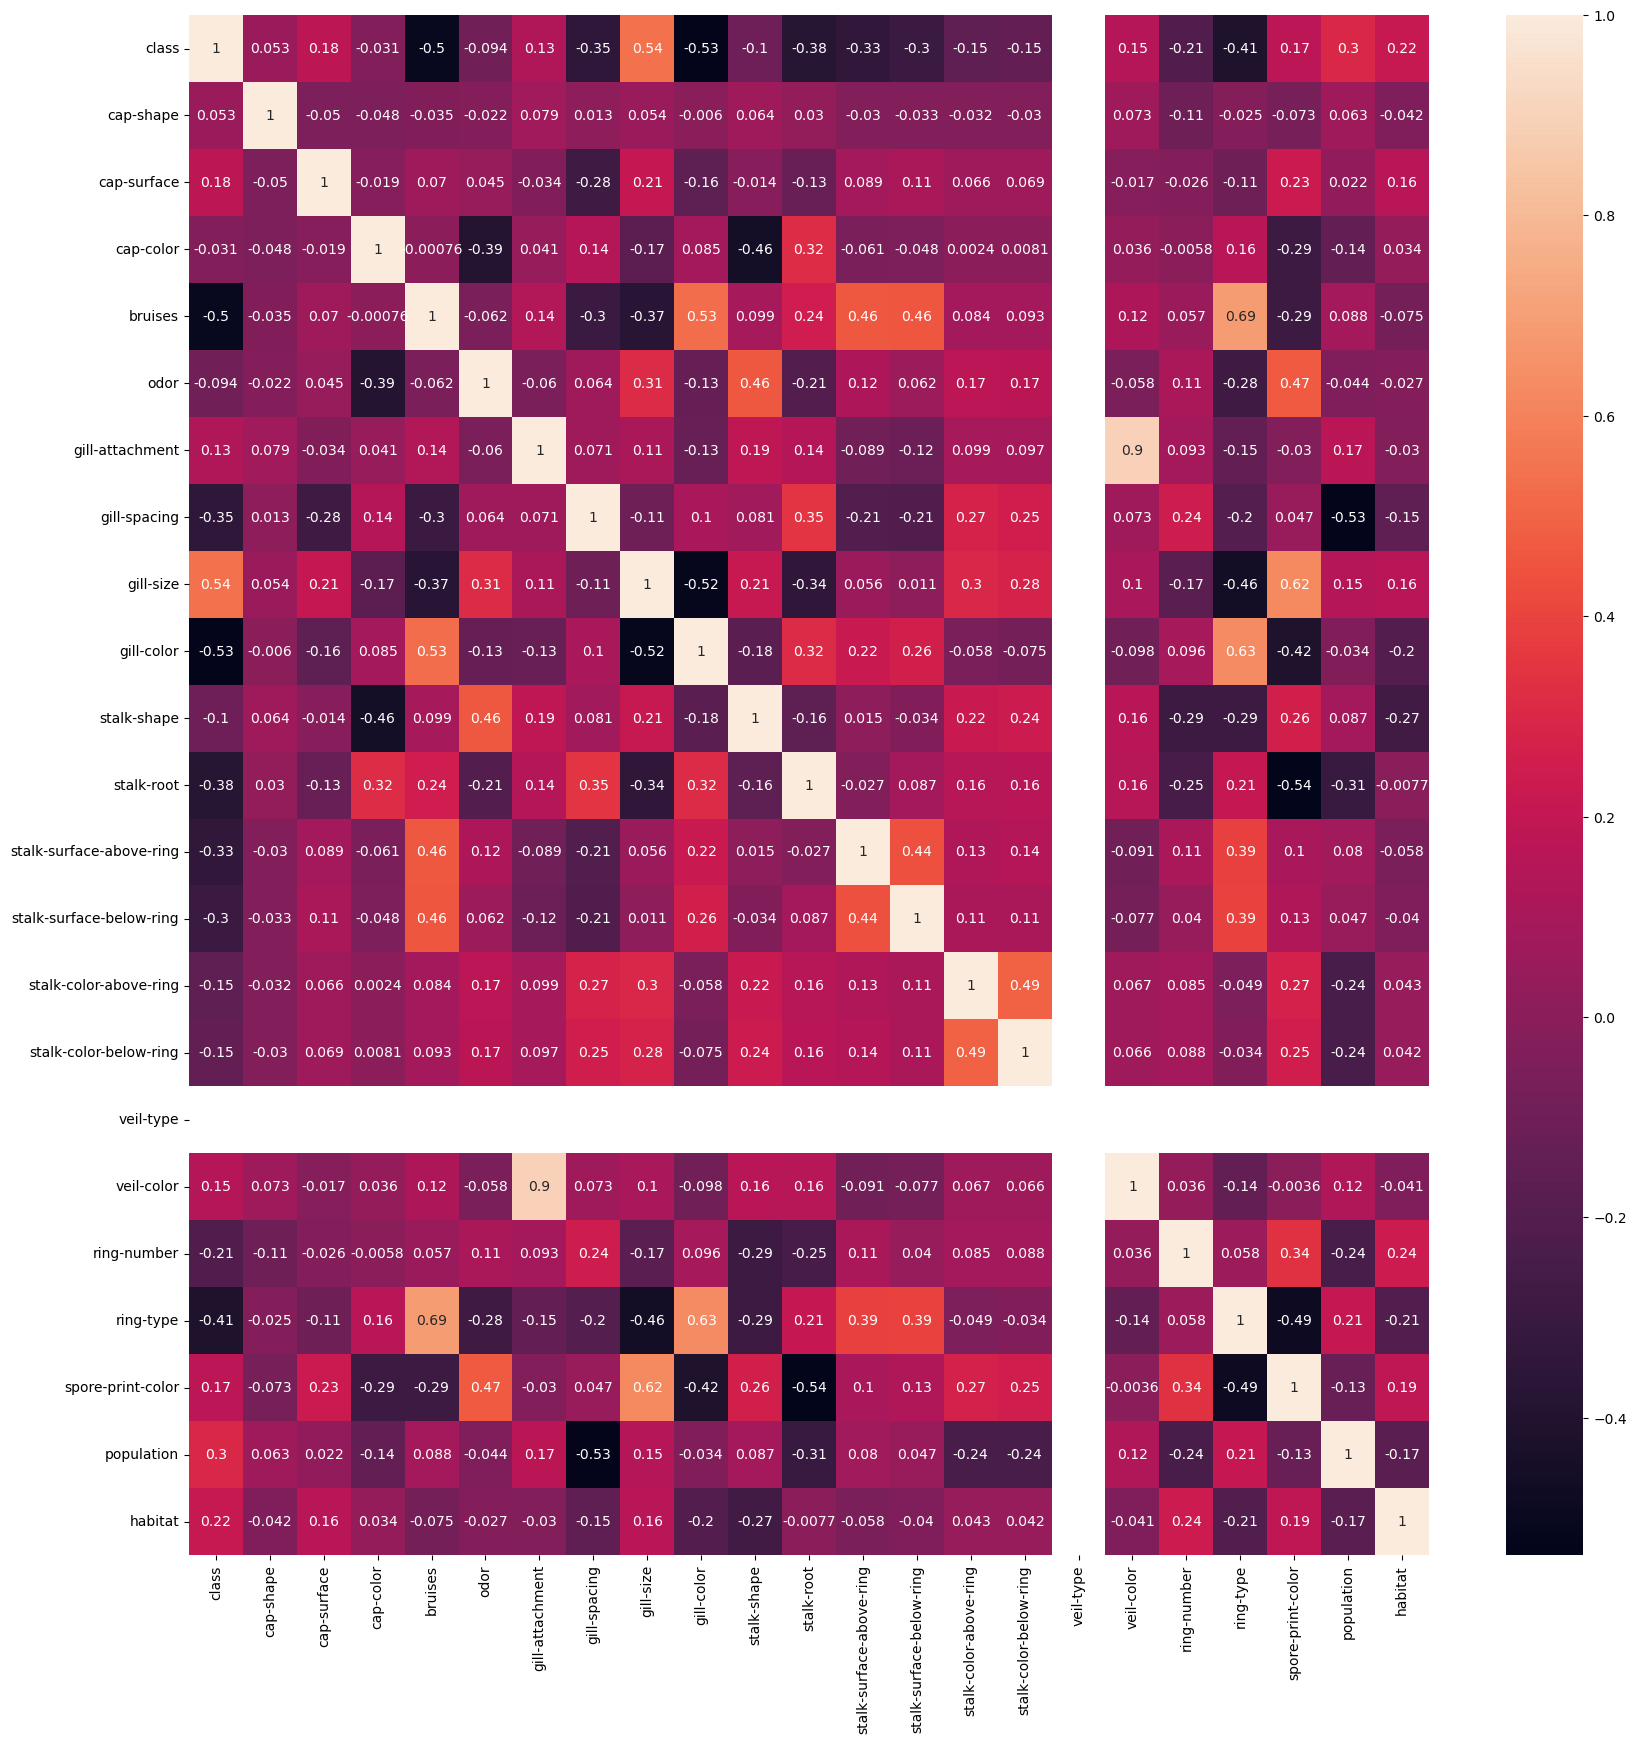

In [115]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

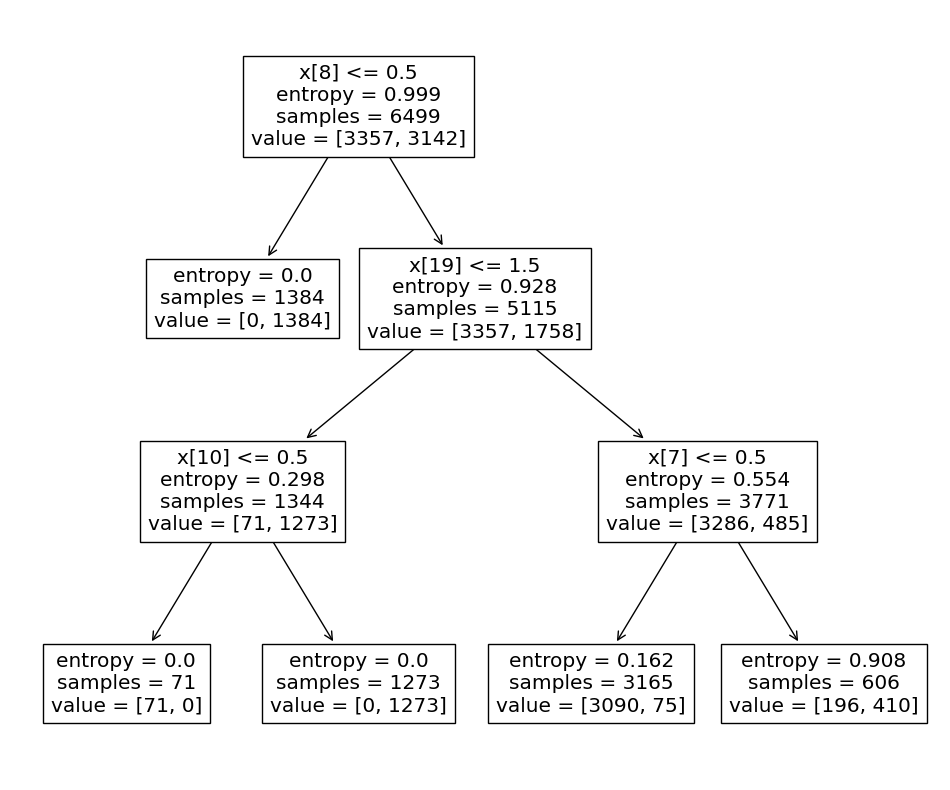